In [3]:
import pandas as pd

# https://www.kaggle.com/datasets/hetulmehta/website-classification
df = pd.read_csv('./data/website_classification.csv')
df.head()

# temp
# df = df.head(100)
# df.reset_index(drop=True, inplace=True)

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


# Exploratory Data Analysis


In [4]:
# remove the index and website_url columns
df.drop(df.columns[[0, 1]], axis=1, inplace=True)
df.head()

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,Travel
1,expedia hotel book sites like use vacation wor...,Travel
2,tripadvisor hotel book sites like previously d...,Travel
3,cheap flights search compare flights momondo f...,Travel
4,bot create free account create free account si...,Travel


### check for missing values

In [5]:
# check for NaN values
df.isnull().sum()

# df.dropna(inplace=True)
# len(df)

cleaned_website_text    0
Category                0
dtype: int64

In [6]:
# check for values that contain only whitespace
blanks = []

for index, text, _ in df.itertuples():
    if type(text) == str:
        if text.isspace():  
            blanks.append(index)

print(len(blanks), 'blanks: ', blanks)
# df.drop(blanks, inplace=True)
# len(df)

0 blanks:  []


In [7]:
df.shape

(1408, 2)

In [8]:
from IPython.display import Markdown, display
text = df['cleaned_website_text'][1][:360]
display(Markdown('> ' + text))

> expedia hotel book sites like use vacation work hard year long day day reward little break new city expedia expedia own expedia use expedia point expedia work expedia offer expedia website look like expedia bargain fare alternative sites expedia blog travelsites hotel booking sites expedia home visit site vote use vacation work hard year long day day reward 

<Axes: xlabel='Category'>

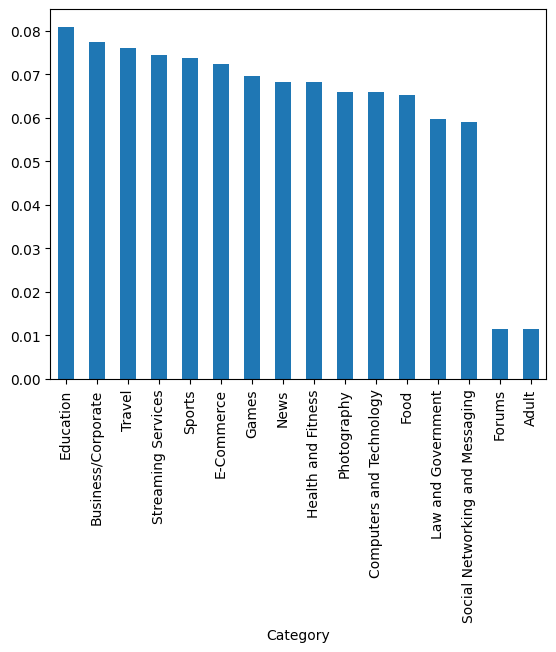

In [9]:
df['Category'].value_counts(normalize=True).plot.bar()

## Text Preprocessing 

In [10]:
import re
import spacy

nlp = spacy.load('en_core_web_sm')
documents = list(df['cleaned_website_text'])
preprocessed_texts = []

for document in documents:
    cleaned_text = re.sub('[^a-zA-Z]', ' ', document)
    doc = nlp(cleaned_text)
    lemmatized_text = [token.lemma_ for token in doc if not token.is_stop]
    preprocessed_texts.append(' '.join(lemmatized_text))

## Split the data into train & test sets:

In [12]:
from sklearn.model_selection import train_test_split

X = preprocessed_texts
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Naïve Bayes Classifier

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline


text_clf_nb = make_pipeline(TfidfVectorizer(), MultinomialNB())

text_clf_nb.fit(X_train, y_train)

predictions = text_clf_nb.predict(X_test)

Text(110.44999999999996, 0.5, 'Predicted label')

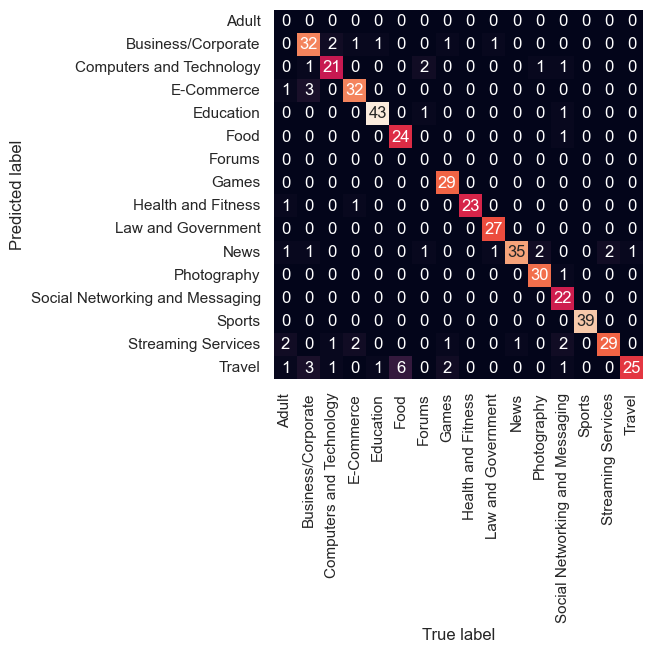

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# Creating Confusion Matrix and Heat Map
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, predictions)
labels = np.unique(y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [33]:
# Analyze results
from sklearn import metrics

print(metrics.classification_report(y_test, predictions, zero_division=1))

                                 precision    recall  f1-score   support

                          Adult       1.00      0.00      0.00         6
             Business/Corporate       0.84      0.80      0.82        40
       Computers and Technology       0.81      0.84      0.82        25
                     E-Commerce       0.89      0.89      0.89        36
                      Education       0.96      0.96      0.96        45
                           Food       0.96      0.80      0.87        30
                         Forums       1.00      0.00      0.00         4
                          Games       1.00      0.88      0.94        33
             Health and Fitness       0.92      1.00      0.96        23
             Law and Government       1.00      0.93      0.96        29
                           News       0.80      0.97      0.88        36
                    Photography       0.97      0.91      0.94        33
Social Networking and Messaging       1.00      0.

In [34]:
# overall accuracy
print(metrics.accuracy_score(y_test, predictions))


0.8838709677419355


# Logistic Regression Classifier

In [35]:
from sklearn.linear_model import LogisticRegression

text_clf_lr = make_pipeline(TfidfVectorizer(), LogisticRegression())

text_clf_lr.fit(X_train, y_train)

predictions = text_clf_lr.predict(X_test)

Text(110.44999999999996, 0.5, 'Predicted label')

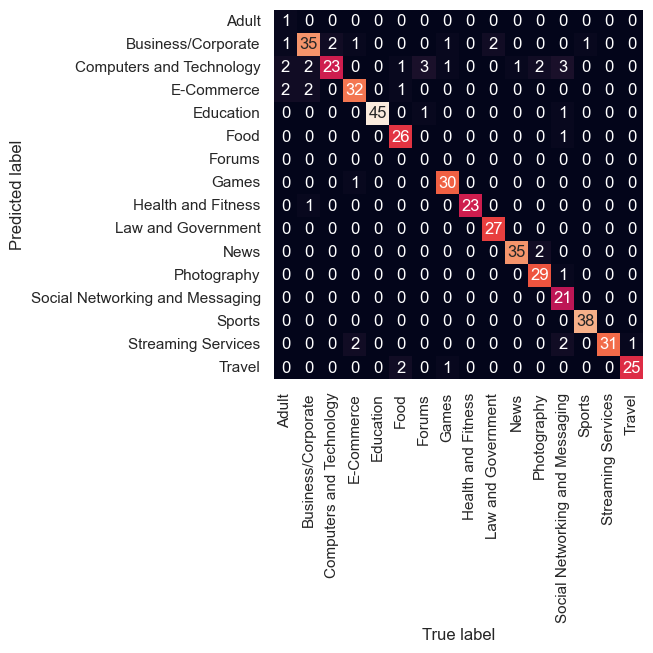

In [36]:
mat = confusion_matrix(y_test, predictions)
labels = np.unique(y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [37]:
print(metrics.classification_report(y_test,predictions, zero_division=1))

                                 precision    recall  f1-score   support

                          Adult       1.00      0.17      0.29         6
             Business/Corporate       0.81      0.88      0.84        40
       Computers and Technology       0.61      0.92      0.73        25
                     E-Commerce       0.86      0.89      0.88        36
                      Education       0.96      1.00      0.98        45
                           Food       0.96      0.87      0.91        30
                         Forums       1.00      0.00      0.00         4
                          Games       0.97      0.91      0.94        33
             Health and Fitness       0.96      1.00      0.98        23
             Law and Government       1.00      0.93      0.96        29
                           News       0.95      0.97      0.96        36
                    Photography       0.97      0.88      0.92        33
Social Networking and Messaging       1.00      0.

In [38]:
print(metrics.accuracy_score(y_test,predictions))

0.9053763440860215


# Linear SVC

In [39]:
from sklearn.svm import LinearSVC

text_clf_lsvc = make_pipeline(TfidfVectorizer(), LinearSVC(dual=False))

text_clf_lsvc.fit(X_train, y_train)

predictions = text_clf_lsvc.predict(X_test)

Text(110.44999999999996, 0.5, 'Predicted label')

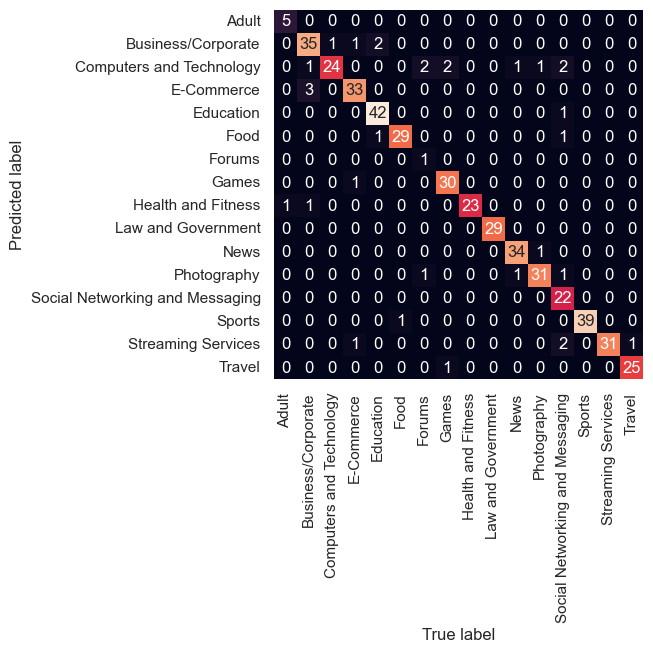

In [40]:
mat = confusion_matrix(y_test, predictions)
labels = np.unique(y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [41]:
print(metrics.classification_report(y_test,predictions, zero_division=1))

                                 precision    recall  f1-score   support

                          Adult       1.00      0.83      0.91         6
             Business/Corporate       0.90      0.88      0.89        40
       Computers and Technology       0.73      0.96      0.83        25
                     E-Commerce       0.92      0.92      0.92        36
                      Education       0.98      0.93      0.95        45
                           Food       0.94      0.97      0.95        30
                         Forums       1.00      0.25      0.40         4
                          Games       0.97      0.91      0.94        33
             Health and Fitness       0.92      1.00      0.96        23
             Law and Government       1.00      1.00      1.00        29
                           News       0.97      0.94      0.96        36
                    Photography       0.91      0.94      0.93        33
Social Networking and Messaging       1.00      0.

In [42]:
print(metrics.accuracy_score(y_test,predictions))

0.9311827956989247
